In [1]:
!pip install Sastrawi
!pip3 install wordcloud
!pip3 install gensim
!pip install spacy

In [2]:
import re
import csv
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
tqdm.pandas()

## Data Cleaning and Preprocessing (some of the cleaning and preprocessing have been done to the dataset so not every function here is used)

In [6]:
def remove_special_character(text):
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    return text.replace("http://", " ").replace("https://", " ")

In [7]:
def remove_number(text):
    return  re.sub(r"\d+", "", text)

In [8]:
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

In [9]:
def remove_whitespace(text):
    txt = text.strip()
    return re.sub('\s+',' ',txt)

In [10]:
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

In [11]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

def stopwords_removal(text):
    return stopword.remove(text)

In [12]:
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)
    return text

In [13]:
def preprocess (data):
    data = data.lower()
    data = remove_special_character(data)
    data = remove_number(data)
    data = remove_punctuation(data)
    data = remove_whitespace (data)
    data = remove_singl_char(data)
    data = stopwords_removal(data)
    data = stemmingText(data)
        
    return data

In [14]:
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

In [15]:
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [16]:
df = pd.read_csv('data_labelled_lexicon.csv')

In [17]:
df['review'] = df['review'].astype(str)

In [18]:
df = df.filter(['date','review','rating','dataset','sentiment','words','polarity','polarity_score'],axis = 1)

In [19]:
contractions = { 
"tranfer" : "transfer",
"tf":"transfer"}

In [20]:
def cont_to_exp(x):
     if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
     else:
        return x

In [21]:
df['review'] = df['review'].apply(lambda x: cont_to_exp(x))

In [22]:
df['review']

0        susah kali top up alfamart selalu jaring repot...
1        dong transfer rekening pribadi sendiri lapor h...
2        alow danakenapa email masuk atas nama ptesbiyd...
3                                           sip dahhhh min
4            login kali login tanya hubung customer servis
                               ...                        
25611                 ga transfer semua bank sangat kecewa
25612    baik login selalu gagal hapus trus donwload ul...
25613                                          kurang puas
25614    jangan pakai ovo layan masalah sangat lelet gu...
25615       udah lama gak gunain mau transfer aja parah si
Name: review, Length: 25616, dtype: object

In [23]:
def manualstop(text):
    listStopwords = ['dahhhh','yg','gk','udah','kok','udh','apa','ga','jadi','kalau','lebih','sama','aja','gitu','kayak','orang','gak','nya','bagu','apa','yg','udh','udah']
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

In [24]:
df['words'] = df['words'].apply(manualstop)

In [25]:
df['words'] = df['review'].apply(word_tokenize)

In [26]:
df['review'] = df['words'].apply(toSentence)

In [27]:
temp = []
data_to_list = df['review'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(data_to_list[i])

In [28]:
data_list = np.array(data_to_list)

In [29]:
#Label Encoding
labels = np.array(df['sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 0:
        y.append(0)
    if labels[i] == 1:
        y.append(1)
    if labels[i] == 2:
        y.append(2)

y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [30]:
#Data Tokenizing
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_list)
sequences = tokenizer.texts_to_sequences(data_list)
review = pad_sequences(sequences, maxlen=max_len)
print(review)

[[   0    0    0 ...  324  573  170]
 [   0    0    0 ...   35  972  265]
 [   0    0    0 ...   62 1612    2]
 ...
 [   0    0    0 ...    0   98  266]
 [   0    0    0 ...   98  390   80]
 [   0    0    0 ...   10  113  241]]


In [31]:
print(labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(review,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

19212 6404 19212 6404


## Model 1 (Sentiment labelled using review rating)

In [33]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 40, input_length=max_len))
model1.add(layers.LSTM(5,dropout=0.6))
model1.add(layers.Dense(3,activation='softmax'))
model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint1 = ModelCheckpoint("model1.hdf5", monitor='val_loss', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=50,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/50
601/601 [==============================] - ETA: 0s - loss: 0.7285 - accuracy: 0.7200
Epoch 00001: val_loss improved from inf to 0.58905, saving model to model1.hdf5
601/601 [==============================] - 26s 40ms/step - loss: 0.7285 - accuracy: 0.7200 - val_loss: 0.5890 - val_accuracy: 0.7917
Epoch 2/50
601/601 [==============================] - ETA: 0s - loss: 0.5448 - accuracy: 0.8087
Epoch 00002: val_loss improved from 0.58905 to 0.54967, saving model to model1.hdf5
601/601 [==============================] - 24s 39ms/step - loss: 0.5448 - accuracy: 0.8087 - val_loss: 0.5497 - val_accuracy: 0.8037
Epoch 3/50
601/601 [==============================] - ETA: 0s - loss: 0.4935 - accuracy: 0.8260
Epoch 00003: val_loss improved from 0.54967 to 0.54065, saving model to model1.hdf5
601/601 [==============================] - 24s 39ms/step - loss: 0.4935 - accuracy: 0.8260 - val_loss: 0.5407 - val_accuracy: 0.8081
Epoch 4/50
601/601 [==============================] - ETA: 0s - l

In [34]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 40)           200000    
                                                                 
 lstm (LSTM)                 (None, 5)                 920       
                                                                 
 dense (Dense)               (None, 3)                 18        
                                                                 
Total params: 200,938
Trainable params: 200,938
Non-trainable params: 0
_________________________________________________________________


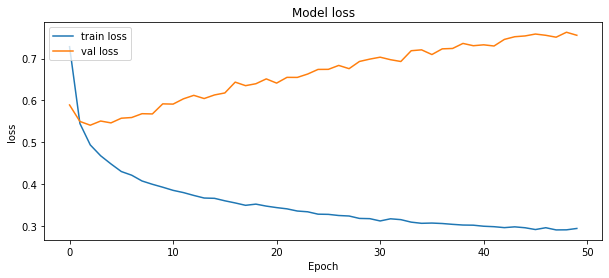

In [35]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history.history['loss'], label = 'train loss')
ax.plot(history.history['val_loss'], label = 'val loss')
ax.set_title('Model loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
ax.legend(loc = 'upper left')
plt.show()

In [36]:
model1 = keras.models.load_model("model1.hdf5")

In [37]:
test_loss, test_acc, = model1.evaluate(X_test, y_test, verbose=2)

201/201 - 2s - loss: 0.5407 - accuracy: 0.8081 - 2s/epoch - 9ms/step


In [38]:
predictions1 = model1.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions1.argmax(axis=1)))
print(matrix)

[[3022    2  375]
 [ 291    1  127]
 [ 431    3 2152]]


In [40]:
from sklearn.metrics import precision_recall_fscore_support as eval

In [41]:
precision, recall, fscore, support = eval(y_test.argmax(axis=1), predictions1.argmax(axis=1))
print('precision (Negative, Neutral,Positive):', precision)
print('recall (Negative,Neutral, Positive):', recall)
print('fscore (Negative,Neutral, Positive):', fscore)

precision (Negative, Neutral,Positive): [0.80715812 0.16666667 0.81085154]
recall (Negative,Neutral, Positive): [0.88908503 0.00238663 0.83217324]
fscore (Negative,Neutral, Positive): [0.84614308 0.00470588 0.82137405]


<AxesSubplot:>

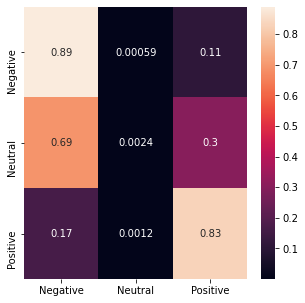

In [42]:
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['Negative','Neutral','Positive'],columns = ['Negative','Neutral','Positive'])
#Normalizing
cmn = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (5,5))
sns.heatmap(cmn, annot=True)

In [43]:
del labels

## Sentiment Labelling using Indonesian Lexicon

In [44]:
lexicon_negative = dict()

with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

In [45]:
lexicon_positive = dict()

with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

In [46]:
def sentiment_analysis_lexicon_indonesia(text):
    for word in text:
        score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 2
    elif (score < 0):
        polarity = 0
    else:
        polarity = 1
    return score, polarity

In [47]:
results = df['words'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

0    12588
2     9614
1     3414
Name: polarity, dtype: int64


In [48]:
df.to_csv('data_labelled_lexicon.csv')

In [49]:
#Label Encoding
labels = np.array(df['polarity'])
y = []
for i in range(len(labels)):
    if labels[i] == 0:
        y.append(0)
    if labels[i] == 1:
        y.append(1)
    if labels[i] == 2:
        y.append(2)

y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [50]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(review,labels, random_state=0)
print (len(X_train1),len(X_test1),len(y_train1),len(y_test1))

19212 6404 19212 6404


## Model 2 (Sentiment labelled using Indonesian Lexicon)

In [51]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.LSTM(5,dropout=0.6))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint2 = ModelCheckpoint("model2.hdf5", monitor='val_loss', verbose=2,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train1, y_train1, epochs=50,validation_data=(X_test1, y_test1),callbacks=[checkpoint2])

Epoch 1/50
600/601 [============================>.] - ETA: 0s - loss: 0.7244 - accuracy: 0.7204
Epoch 00001: val_loss improved from inf to 0.48707, saving model to model2.hdf5
601/601 [==============================] - 26s 41ms/step - loss: 0.7243 - accuracy: 0.7205 - val_loss: 0.4871 - val_accuracy: 0.8568
Epoch 2/50
601/601 [==============================] - ETA: 0s - loss: 0.4302 - accuracy: 0.8654
Epoch 00002: val_loss improved from 0.48707 to 0.38673, saving model to model2.hdf5
601/601 [==============================] - 25s 41ms/step - loss: 0.4302 - accuracy: 0.8654 - val_loss: 0.3867 - val_accuracy: 0.8832
Epoch 3/50
600/601 [============================>.] - ETA: 0s - loss: 0.3398 - accuracy: 0.8957
Epoch 00003: val_loss improved from 0.38673 to 0.34588, saving model to model2.hdf5
601/601 [==============================] - 24s 39ms/step - loss: 0.3399 - accuracy: 0.8957 - val_loss: 0.3459 - val_accuracy: 0.8879
Epoch 4/50
601/601 [==============================] - ETA: 0s - l

In [52]:
model2 = keras.models.load_model("model2.hdf5")

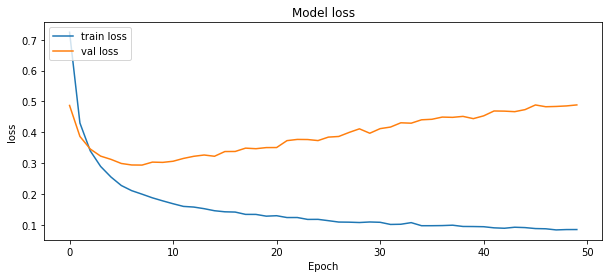

In [53]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history.history['loss'], label = 'train loss')
ax.plot(history.history['val_loss'], label = 'val loss')
ax.set_title('Model loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
ax.legend(loc = 'upper left')
plt.show()

In [54]:
test_loss, test_acc, = model2.evaluate(X_test1, y_test1, verbose=2)

201/201 - 2s - loss: 0.2939 - accuracy: 0.8976 - 2s/epoch - 9ms/step


In [55]:
predictions2 = model2.predict(X_test1)

In [56]:
precision, recall, fscore, support = eval(y_test1.argmax(axis=1), predictions2.argmax(axis=1))
print('precision (Negative, Neutral,Positive):', precision)
print('recall (Negative,Neutral, Positive):', recall)
print('fscore (Negative,Neutral, Positive):', fscore)

precision (Negative, Neutral,Positive): [0.89494048 0.89428076 0.90190515]
recall (Negative,Neutral, Positive): [0.95490632 0.61209964 0.92247098]
fscore (Negative,Neutral, Positive): [0.92395145 0.72676056 0.91207215]


In [57]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test1.argmax(axis=1), np.around(predictions2.argmax(axis=1)))
print(matrix)

[[3007   34  108]
 [ 193  516  134]
 [ 160   27 2225]]


In [58]:
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['Negative','Neutral','Positive'],columns = ['Negative','Neutral','Positive'])

<AxesSubplot:>

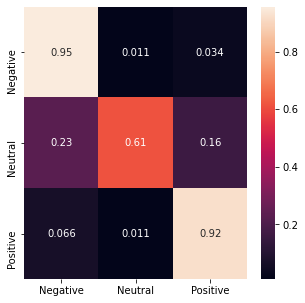

In [59]:
#Normalizing
cmn = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (5,5))
sns.heatmap(cmn, annot=True)

In [60]:
sentiment = ['Negative','Neutral','Positive']
text = 'Awalnya saya ragu untuk memakai aplikasi ini karena ratingnya yang kurang baik. Begitu saya coba, ternyata tidak ada kendala sama sekali baik dari transfer dana ke doku wallet dan payment di merchantnya. Semua diproses dengan cepat. Terima kasih'
textp = preprocess(text)
sequence = tokenizer.texts_to_sequences([textp])
test = pad_sequences(sequence, maxlen=max_len)
print(text)
sentiment[np.around(model1.predict(test), decimals=0).argmax(axis=1)[0]]

Awalnya saya ragu untuk memakai aplikasi ini karena ratingnya yang kurang baik. Begitu saya coba, ternyata tidak ada kendala sama sekali baik dari transfer dana ke doku wallet dan payment di merchantnya. Semua diproses dengan cepat. Terima kasih


'Positive'

In [61]:
#df.loc[(df['polarity'] == 2) & (df['sentiment'] == 0)]
df.loc[df['dataset'] == 'Dana App Store'].groupby(by = ['dataset','polarity']).count()

date  review  rating  sentiment  words  \
dataset        polarity                                           
Dana App Store 0         1277    1277    1277       1277   1277   
               1          307     307     307        307    307   
               2         1236    1236    1236       1236   1236   

                         polarity_score  
dataset        polarity                  
Dana App Store 0                   1277  
               1                    307  
               2                   1236

In [62]:
df.loc[df['dataset'] == 'Dana App Store'].groupby(by = ['dataset','sentiment']).count()

date  review  rating  words  polarity  \
dataset        sentiment                                          
Dana App Store 0          1721    1721    1721   1721      1721   
               1           188     188     188    188       188   
               2           911     911     911    911       911   

                          polarity_score  
dataset        sentiment                  
Dana App Store 0                    1721  
               1                     188  
               2                     911

In [63]:
df.loc[df['dataset'] == 'Dana Google Play'].groupby(by = ['dataset','polarity']).count()

date  review  rating  sentiment  words  \
dataset          polarity                                           
Dana Google Play 0         2324    2324    2324       2324   2324   
                 1          844     844     844        844    844   
                 2         2727    2727    2727       2727   2727   

                           polarity_score  
dataset          polarity                  
Dana Google Play 0                   2324  
                 1                    844  
                 2                   2727

In [64]:
df.loc[df['dataset'] == 'Dana Google Play'].groupby(by = ['dataset','sentiment']).count()

date  review  rating  words  polarity  \
dataset          sentiment                                          
Dana Google Play 0          2466    2466    2466   2466      2466   
                 1           428     428     428    428       428   
                 2          3001    3001    3001   3001      3001   

                            polarity_score  
dataset          sentiment                  
Dana Google Play 0                    2466  
                 1                     428  
                 2                    3001

In [65]:
df.loc[df['review'].str.contains('tampil', case=False)]

,date,review,rating,dataset,sentiment,words,polarity,polarity_score
101,2022-02-08 00:57:22,neng banget pake aplikasi soal tampil nya cant...,5,LinkAja App Store,2,"[neng, banget, pake, aplikasi, soal, tampil, n...",0,-7
174,2022-02-03 08:03:28,mudah beli pulsa lain mudah aplikasi milik tam...,5,LinkAja App Store,2,"[mudah, beli, pulsa, lain, mudah, aplikasi, mi...",0,-5
193,2022-02-03 03:46:48,ngebantu banget tampil enak liat appnya bagus,5,LinkAja App Store,2,"[ngebantu, banget, tampil, enak, liat, appnya,...",0,-2
212,2022-02-02 14:09:28,tampil bagus,5,LinkAja App Store,2,"[tampil, bagus]",0,-4
341,2022-01-27 06:34:42,tampil aplikasi nya keren banget banyak fitur ...,5,LinkAja App Store,2,"[tampil, aplikasi, nya, keren, banget, banyak,...",0,-1
...,...,...,...,...,...,...,...,...
23270,2022-04-30 11:45:55,tampil bagus simple tarik mudah guna masyaraka...,5,OVO Google Play,2,"[tampil, bagus, simple, tarik, mudah, guna, ma...",2,2
23436,2022-04-29 12:11:38,tampil onclik nya kluar trus pas buka ovo,3,OVO Google Play,1,"[tampil, onclik, nya, kluar, trus, pas, buka, ...",2,1
23999,2022-04-25 23:57:41,sangat bagus aplikasi ovo update baru yah jang...,5,OVO Google Play,2,"[sangat, bagus, aplikasi, ovo, update, baru, y...",0,-23
24948,2022-04-20 08:02:53,gimana cara tampil kan scrensut barcot qrais,4,OVO Google Play,2,"[gimana, cara, tampil, kan, scrensut, barcot, ...",0,-2


In [66]:
df

,date,review,rating,dataset,sentiment,words,polarity,polarity_score
0,2022-06-07 12:18:20,susah kali top up alfamart selalu jaring repot...,2,Dana App Store,0,"[susah, kali, top, up, alfamart, selalu, jarin...",1,0
1,2022-06-08 21:47:23,dong transfer rekening pribadi sendiri lapor h...,1,Dana Google Play,0,"[dong, transfer, rekening, pribadi, sendiri, l...",2,7
2,2022-06-08 20:11:53,alow danakenapa email masuk atas nama ptesbiyd...,1,Dana Google Play,0,"[alow, danakenapa, email, masuk, atas, nama, p...",0,-5
3,2022-06-08 19:55:00,sip dahhhh min,4,Dana Google Play,2,"[sip, dahhhh, min]",1,0
4,2022-06-08 19:51:52,login kali login tanya hubung customer servis,1,Dana Google Play,0,"[login, kali, login, tanya, hubung, customer, ...",2,1
...,...,...,...,...,...,...,...,...
25611,2022-04-16 00:47:08,ga transfer semua bank sangat kecewa,1,OVO Google Play,0,"[ga, transfer, semua, bank, sangat, kecewa]",0,-5
25612,2022-04-16 00:42:45,baik login selalu gagal hapus trus donwload ul...,1,OVO Google Play,0,"[baik, login, selalu, gagal, hapus, trus, donw...",0,-7
25613,2022-04-16 00:39:37,kurang puas,1,OVO Google Play,0,"[kurang, puas]",1,0
25614,2022-04-16 00:24:37,jangan pakai ovo layan masalah sangat lelet gu...,1,OVO Google Play,0,"[jangan, pakai, ovo, layan, masalah, sangat, l...",0,-38


## Insight and Visualization

In [67]:
def sent_name(data):
    if data == 0:
        return 'Negative'
    elif data == 1:
        return 'Neutral'
    else:
        return 'Positive'

In [68]:
def appname(data):
    if 'Dana' in data:
        return 'Dana'
    elif 'OVO' in data:
        return 'OVO'
    else:
        return 'LinkAja'

In [69]:
def storename(data):
    if 'App Store' in data:
        return 'Apple App Store'
    else:
        return 'Google Play Store'

In [70]:
df['sentiment_name']= df['polarity'].progress_apply(sent_name)

In [71]:
df['App']= df['dataset'].progress_apply(appname)

In [72]:
df['App Store']= df['dataset'].progress_apply(storename)

In [73]:
df

,date,review,rating,dataset,sentiment,words,polarity,polarity_score,sentiment_name,App,App Store
0,2022-06-07 12:18:20,susah kali top up alfamart selalu jaring repot...,2,Dana App Store,0,"[susah, kali, top, up, alfamart, selalu, jarin...",1,0,Neutral,Dana,Apple App Store
1,2022-06-08 21:47:23,dong transfer rekening pribadi sendiri lapor h...,1,Dana Google Play,0,"[dong, transfer, rekening, pribadi, sendiri, l...",2,7,Positive,Dana,Google Play Store
2,2022-06-08 20:11:53,alow danakenapa email masuk atas nama ptesbiyd...,1,Dana Google Play,0,"[alow, danakenapa, email, masuk, atas, nama, p...",0,-5,Negative,Dana,Google Play Store
3,2022-06-08 19:55:00,sip dahhhh min,4,Dana Google Play,2,"[sip, dahhhh, min]",1,0,Neutral,Dana,Google Play Store
4,2022-06-08 19:51:52,login kali login tanya hubung customer servis,1,Dana Google Play,0,"[login, kali, login, tanya, hubung, customer, ...",2,1,Positive,Dana,Google Play Store
...,...,...,...,...,...,...,...,...,...,...,...
25611,2022-04-16 00:47:08,ga transfer semua bank sangat kecewa,1,OVO Google Play,0,"[ga, transfer, semua, bank, sangat, kecewa]",0,-5,Negative,OVO,Google Play Store
25612,2022-04-16 00:42:45,baik login selalu gagal hapus trus donwload ul...,1,OVO Google Play,0,"[baik, login, selalu, gagal, hapus, trus, donw...",0,-7,Negative,OVO,Google Play Store
25613,2022-04-16 00:39:37,kurang puas,1,OVO Google Play,0,"[kurang, puas]",1,0,Neutral,OVO,Google Play Store
25614,2022-04-16 00:24:37,jangan pakai ovo layan masalah sangat lelet gu...,1,OVO Google Play,0,"[jangan, pakai, ovo, layan, masalah, sangat, l...",0,-38,Negative,OVO,Google Play Store


<Figure size 720x576 with 0 Axes>

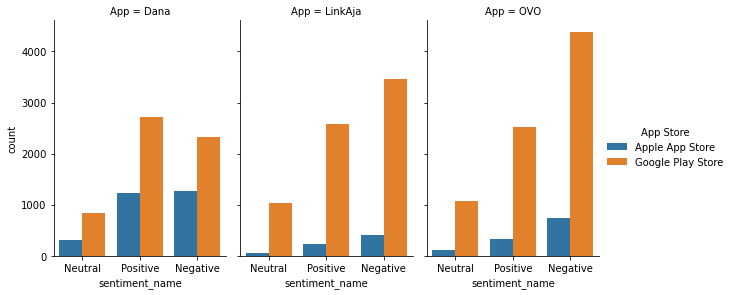

In [75]:
plt.figure(figsize=(10, 8))
sns.catplot(x="sentiment_name", hue="App Store", col="App",
                data=df, kind="count",
                height=4, aspect=.7);
plt.savefig("Best Sentiment both appstore.png")

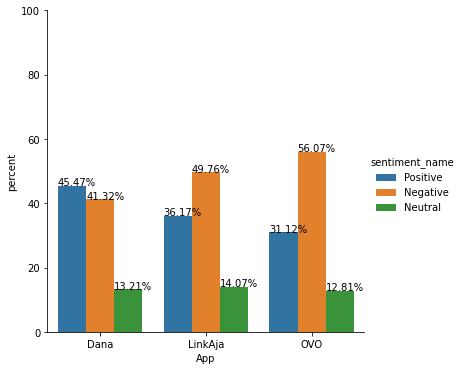

In [76]:
x,y = 'App', 'sentiment_name'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [77]:
g.savefig("output.png")

In [78]:
dfIT = df.loc[df['App Store'] == 'Apple App Store']
dfGP = df.loc[df['App Store'] == 'Google Play Store']

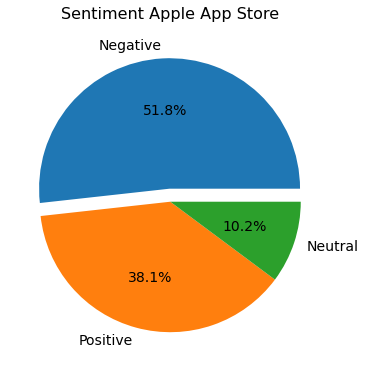

In [79]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in dfIT['sentiment_name'].value_counts()]
labels = list(dfIT['sentiment_name'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Apple App Store', fontsize = 16, pad = 20)
plt.show()
fig.savefig("apple_sentiment.png")

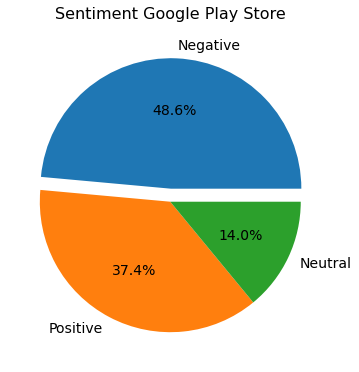

In [80]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in dfGP['sentiment_name'].value_counts()]
labels = list(dfGP['sentiment_name'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Google Play Store', fontsize = 16, pad = 20)
plt.show()
fig.savefig("google_sentiment.png")

Common Words Bar Chart Data Preparation

In [116]:
cw_dana_neg = df['words'].loc[(df['dataset'].str.contains('Dana', case=False)) & (df['sentiment'] == 0)]
cw_dana_pos = df['words'].loc[(df['dataset'].str.contains('Dana', case=False)) & (df['sentiment'] == 2)]
cw_ovo_neg = df['words'].loc[(df['dataset'].str.contains('OVO', case=False)) & (df['sentiment'] == 0)]
cw_ovo_pos = df['words'].loc[(df['dataset'].str.contains('OVO', case=False)) & (df['sentiment'] == 2)]
cw_linkaja_neg = df['words'].loc[(df['dataset'].str.contains('LinkAja', case=False)) & (df['sentiment'] == 0)]
cw_linkaja_pos = df['words'].loc[(df['dataset'].str.contains('LinkAja', case=False)) & (df['sentiment'] == 2)]

In [117]:
cw_dana_neg = list(cw_dana_neg)
cw_dana_pos = list(cw_dana_pos)
cw_ovo_neg = list(cw_ovo_neg)
cw_ovo_pos = list(cw_ovo_pos)
cw_linkaja_neg = list(cw_linkaja_neg)
cw_linkaja_pos = list(cw_linkaja_pos)

In [118]:
import collections
import itertools

In [119]:
cw_dana_pos = list(itertools.chain(*cw_dana_pos))

In [120]:
cw_dana_neg = list(itertools.chain(*cw_dana_neg))

In [121]:
cw_ovo_neg = list(itertools.chain(*cw_ovo_neg))

In [122]:
cw_ovo_pos = list(itertools.chain(*cw_ovo_pos))

In [123]:
cw_linkaja_neg = list(itertools.chain(*cw_linkaja_neg))

In [124]:
cw_linkaja_pos = list(itertools.chain(*cw_linkaja_pos))

Dana Common Words

In [125]:
common_dana_neg = collections.Counter(cw_dana_neg)

common_dana_neg.most_common(15)

[('dana', 2372),
 ('masuk', 1046),
 ('aplikasi', 951),
 ('nya', 863),
 ('saldo', 841),
 ('ga', 833),
 ('gak', 744),
 ('mau', 724),
 ('uang', 712),
 ('udah', 519),
 ('transfer', 508),
 ('lama', 486),
 ('up', 477),
 ('transaksi', 470),
 ('aja', 457)]

In [126]:
dana_neg = pd.DataFrame(common_dana_neg.most_common(15),
                             columns=['words', 'count'])

In [127]:
common_dana_pos = collections.Counter(cw_dana_pos)

common_dana_pos.most_common(15)

[('dana', 1246),
 ('sangat', 807),
 ('aplikasi', 548),
 ('bantu', 526),
 ('mudah', 451),
 ('bagus', 414),
 ('nya', 369),
 ('transaksi', 357),
 ('transfer', 275),
 ('mantap', 241),
 ('baik', 230),
 ('guna', 199),
 ('banget', 198),
 ('buat', 196),
 ('uang', 195)]

In [128]:
dana_pos = pd.DataFrame(common_dana_pos.most_common(15),
                             columns=['words', 'count'])

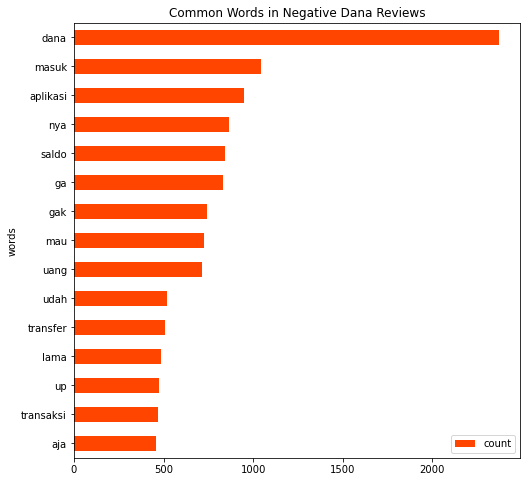

In [129]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
dana_neg.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orangered")

ax.set_title("Common Words in Negative Dana Reviews")

plt.show()

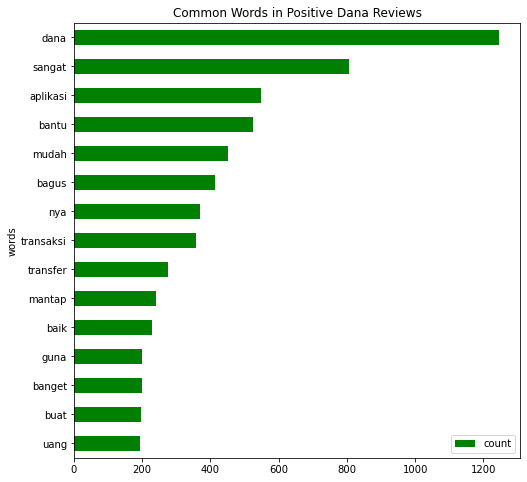

In [130]:
fig2, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
dana_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words in Positive Dana Reviews")

plt.show()

OVO Common Words

In [131]:
common_ovo_neg = collections.Counter(cw_ovo_neg)

common_ovo_neg.most_common(15)

[('ovo', 2906),
 ('aplikasi', 1385),
 ('transfer', 1278),
 ('mau', 1262),
 ('nya', 1130),
 ('masuk', 1104),
 ('gak', 1096),
 ('ga', 1008),
 ('saldo', 990),
 ('aja', 905),
 ('gagal', 862),
 ('udah', 792),
 ('susah', 711),
 ('padahal', 682),
 ('sama', 677)]

In [132]:
ovo_neg = pd.DataFrame(common_ovo_neg.most_common(15),
                             columns=['words', 'count'])

In [133]:
common_ovo_pos = collections.Counter(cw_ovo_pos)

common_ovo_pos.most_common(15)

[('ovo', 813),
 ('sangat', 381),
 ('aplikasi', 316),
 ('bagus', 272),
 ('nya', 261),
 ('mudah', 255),
 ('bantu', 248),
 ('transaksi', 216),
 ('transfer', 169),
 ('baik', 155),
 ('guna', 147),
 ('yg', 127),
 ('bayar', 123),
 ('lebih', 114),
 ('mau', 112)]

In [134]:
ovo_pos = pd.DataFrame(common_ovo_pos.most_common(15),
                             columns=['words', 'count'])

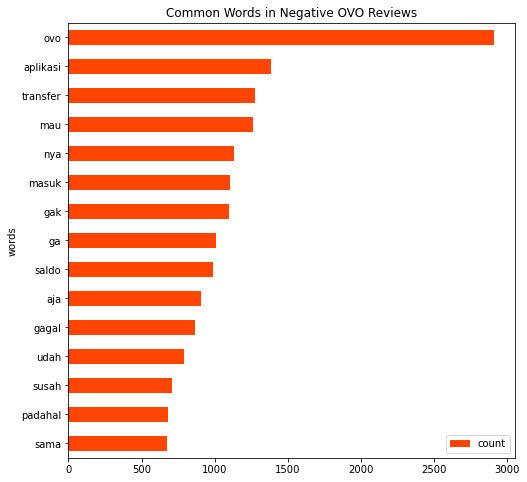

In [135]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
ovo_neg.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orangered")

ax.set_title("Common Words in Negative OVO Reviews")

plt.show()

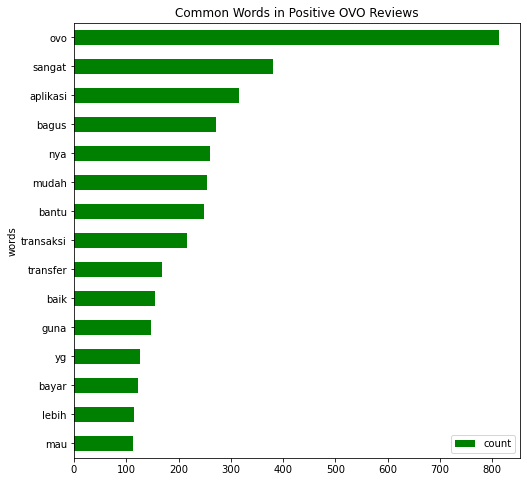

In [136]:
fig2, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
ovo_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words in Positive OVO Reviews")

plt.show()

Link Aja Common Words

In [137]:
common_linkaja_neg = collections.Counter(cw_linkaja_neg)

common_linkaja_neg.most_common(15)

[('aplikasi', 920),
 ('aja', 857),
 ('saldo', 746),
 ('masuk', 690),
 ('gak', 682),
 ('nya', 598),
 ('link', 579),
 ('mau', 557),
 ('otomatis', 546),
 ('ga', 513),
 ('jam', 502),
 ('padahal', 494),
 ('udah', 480),
 ('buka', 431),
 ('linkaja', 406)]

In [138]:
linkaja_neg = pd.DataFrame(common_linkaja_neg.most_common(15),
                             columns=['words', 'count'])

In [139]:
common_linkaja_pos = collections.Counter(cw_linkaja_pos)

common_linkaja_pos.most_common(15)

[('aplikasi', 944),
 ('sangat', 941),
 ('mudah', 781),
 ('bantu', 622),
 ('bagus', 519),
 ('link', 513),
 ('aja', 506),
 ('linkaja', 470),
 ('bayar', 440),
 ('transaksi', 434),
 ('guna', 356),
 ('nya', 335),
 ('banget', 291),
 ('mantap', 216),
 ('baik', 207)]

In [140]:
linkaja_pos = pd.DataFrame(common_linkaja_pos.most_common(15),
                             columns=['words', 'count'])

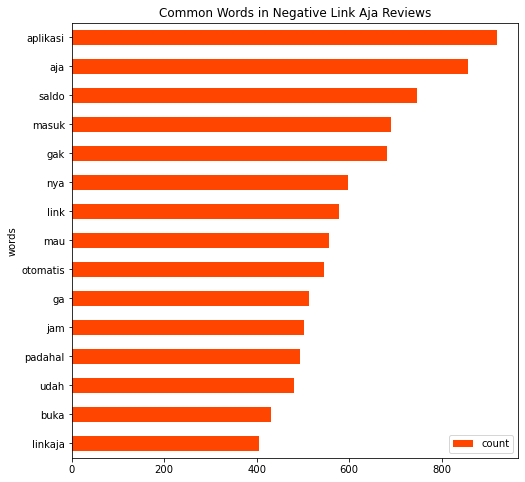

In [141]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
linkaja_neg.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orangered")

ax.set_title("Common Words in Negative Link Aja Reviews")

plt.show()

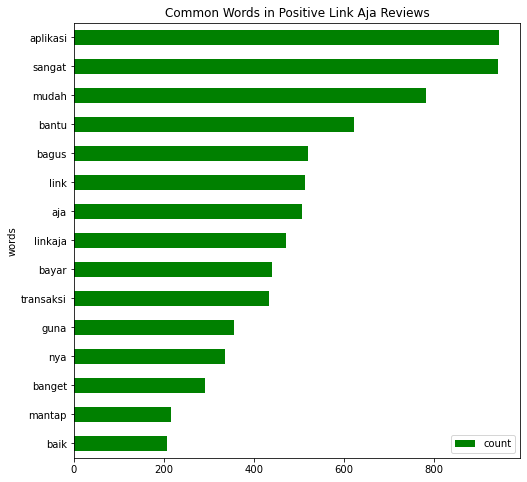

In [142]:
fig2, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
linkaja_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words in Positive Link Aja Reviews")

plt.show()